# Computing the spectra to test the window function

### 0) Including the libraries

In [1]:
from catalog_specs import cat_specs #to set the catalog specifications
from cosmo import cosmo #to set the cosmology
from code_options import code_parameters #to set the cosmological parameters
from converting_cats_in_cats_of_bins import * #To convert any halo catalog according to bins of mass
from colossus.cosmology import cosmology #To compute bias
from colossus.lss import bias #To compute bias
from create_grids_from_xyz_cats_beta import * #to build the cats
from MTPK_estimate_beta import * #to estimate the spectra
import numpy as np
import matplotlib.pyplot as plt

### 1) Instantiating the parameters

The fiducial **specifications** about the **catalogs** are given by:

In [2]:
cat_specs = cat_specs(ntracers = 1, n_maps = 1, 
                      x_cat_min = -500.1, y_cat_min = -500.1, z_cat_min = 4995.0,
                     x_cat_max = 500.1, y_cat_max = 500.1, z_cat_max = 6001.0)
cat_specs.parameters_print()

ntracers = 1
n_maps = 1
col_m = 6
col_x = 0
col_y = 1
col_z = 2
x_cat_min = -500.1
y_cat_min = -500.1
z_cat_min = 4995.0
x_cat_max = 500.1
y_cat_max = 500.1
z_cat_max = 6001.0
crit_min = 11.5
crit_max = 13.0


The **cosmology** is given by:

In [3]:
h = 0.6711
zmin = 4.0 #Minimum redshift
zmax = 7.8 #Maximum redshift
zcentral = (zmin + zmax)/2. #Mean redshift in the data
my_cosmology = cosmo(h = h, Omega0_b = 0.049, Omega0_cdm = 0.2685,
              Omega0_k = 0.0, Omega0_DE = 0.6825, A_s = 2.1277e-9,
              n_s = 0.9624, w0 = - 1.0, w1 = 0.0, z_re = 9.99999,
              flat = True, gamma = 0.5454, zcentral = zcentral,
                    matgrow = cosmo().f_evolving(0))

In [4]:
my_cosmology.parameters_print()

h = 0.6711
Omega0_b = 0.049
Omega0_cdm = 0.2685
Omega0_k = 0.0
Omega0_DE = 0.6825
A_s = 2.1277e-09
ln10e10AsA = 3.057626677091581
n_s = 0.9624
w0 = -1.0
w1 = 0.0
z_re = 9.99999
flat = True
gamma = 0.5454
matgrow = 0.5252511834620611
zcentral = 5.9
c_light = 299792.458


### 2) Catalogs

In [5]:
MF = np.array([45120/(1000.**3)])
MF

array([4.512e-05])

In [6]:
b = [1.0]
b

[1.0]

### 3) Setting `MTPK code` options

Using the computed _mass function_ and _bias_

In [7]:
#Defining the code options
my_code_options = code_parameters(verbose = True, method = 'FKP',
                                  mas_method = 'CIC',
                                  multipoles_order = 4,
                                  do_cross_spectra = False, 
                                  ntracers = 1,
                                  mass_fun = MF,
                                  cell_size = 4.0,
                                  n_x = 250, n_y = 250, n_z = 250,
                                  n_x_orig = -125.0, n_y_orig = -125.0, n_z_orig = 5000.0,
                                  use_kmin_phys = False, kmin_phys = 0.025,
                                  use_kmax_phys = True, kmax_phys = 0.5,
                                  tracer_bias = np.array(b))

In [8]:
my_code_options.parameters_print()

verbose = True
method = FKP
mas_method = CIC
ntracers = 1
use_kdip_phys = False
kdip_phys = 0.005
multipoles_order = 4
do_cross_spectra = False
use_padding = False
padding_length = [10, 10, 10]
use_theory_spectrum = False
theory_spectrum_file = theory_spectrum_file.txt
use_mask = False
mask_filename = mask.hdf5
mass_fun = [4.512e-05]
tracer_bias = [1.]
cell_size = 4.0
n_x = 250
n_y = 250
n_z = 250
n_x_orig = -125.0
n_y_orig = -125.0
n_z_orig = 5000.0
sel_fun_data = False
sel_fun_file = sel_fun-N128_halos.hdf5
kmin_bias = 0.05
kmax_bias = 0.15
kph_central = 0.1
dkph_bin = 0.01
use_kmin_phys = False
kmin_phys = 0.025
use_kmax_phys = True
kmax_phys = 0.5
whichspec = 1
k_min_CAMB = 0.0001
k_max_CAMB = 1.0
split_tracers = False
tracer_bins = [3.16e+11 1.00e+12 3.16e+12 1.00e+13]
mask_spillover_cells = False
batch_size = 1000000
wrap = False


### 4) Creating the catalogs

You can create the cats using `create_grids_from_xyz_cats_beta`

In [9]:
#User definitions about where to do each thing
input_filename = 'window'
filenames_catalogs = 'data/window/Data_RSD_xyz-L0-5000.dat'
dir_out = "maps/sims/window/"

In [10]:
create_grids_from_xyz_cats(cat_specs, my_cosmology, my_code_options, 
                           input_filename, filenames_catalogs, dir_out)


Will load maps stored in files:
[['data/window/Data_RSD_xyz-L0-5000.dat']]
Dimensions of the grids: n_x, n_y, n_z = 250 250 250

The actual catalog spans the ranges in x,y,z:
x: -500.1 --> 500.1
y: -500.1 --> 500.1
z: 4995.0 --> 6001.0


With the padding length, of  0 cells, the box will be filled with:
x: ( 0 * 0 , 250 , 0 *0)
y: ( 0 * 0 , 250 , 0 *0)
z: ( 0 * 0 , 250 , 0 *0)

Check: given the padding, your catalog should end at cartesian positions:
max(x) = 1000.0
max(y) = 1000.0
max(z) = 1000.0

Origin (0,0,0) of box will be considered to be displaced from the observer @Earth
by these numbers of cells in each direction:    (This affects RSDs!)
n_x_orig= -125.0
n_y_orig= -125.0
n_z_orig= 5000.0


Mass assignement: Clouds in Cell (CiC)

Processing catalog # 0
Reading catalog for tracer 0
Original catalog has 45120 objects
Processing batch # 0 of 0
Processing objects # 0 to 45120
... after placing objects in grid there are 44812 objects.
Final/original number: 99.32 %

Saving grid of 

### 5) Estimating the spectra

You can estimate the spectra using the function inside `MTPK_estimate_beta` code. The `handle_data` is the same as the `input_file_name`

In [11]:
#Some user options
handle_data = "window"
dir_maps = 'maps/sims/window/'
dir_data = 'maps/data/window/'
dir_specs = 'spectra/window/'

In [12]:
MTPK_estimate(cat_specs, my_cosmology, my_code_options, dir_maps, dir_data, dir_specs, handle_data = handle_data)



This is the Multi-tracer power spectrum estimator

Handle of this run (fiducial spectra, biases, etc.):  window

Beggining CAMB calculations

Computing matter power spectrum for given cosmology...

.
Generating the k-space Grid...
.
Will use the N = 1  simulation-only maps contained in directory maps/sims/window/
.
Geometry: (nx,ny,nz) = (250,250,250),  cell_size=4.0 h^-1 Mpc
Geometry including bounding box: (nx,ny,nz) = (250,250,250)
.
Using power spectrum from CAMB + HaloFit
.
----------------------------------
.
Will estimate modes up to k[h/Mpc] =  0.5000  in bins with Delta_k = 0.0100
.
----------------------------------
.

----------------------------------

Central physical k values where spectra will be estimated: 0.1
Initializing the k-binning matrix...
Done with k-binning matrices. Time cost:  3.343 s
Memory occupied by the binning matrix:  1016226
Originally k_bar was defined as: ['0.0683', '0.0810', '0.0937']
The true mean of k for each bin is: ['0.0683', '0.0811', '0.093

### 6) Some plots

In [13]:
spectra = pd.read_csv('spectra/window/window-spectra.csv')

In [14]:
spectra.head()

,k,P0_FKP_map0_tracer0,P2_FKP_map0_tracer0,P4_FKP_map0_tracer0
0,0.007212,89256.461464,7237.327967,-193018.069978
1,0.017212,80034.546817,8798.836307,92480.571647
2,0.027212,69227.825171,-4129.091033,-14692.778624
3,0.037212,66327.220584,7682.052644,9348.551333
4,0.047212,46548.055814,15006.733577,6654.500435


In [15]:
ntracers = cat_specs.ntracers
n_maps = cat_specs.n_maps

k = spectra['k'].values
n_k = k.shape[0]

P0_FKP = np.zeros( ( ntracers, n_maps, n_k ) )
P2_FKP = np.zeros( ( ntracers, n_maps, n_k ) )
P4_FKP = np.zeros( ( ntracers, n_maps, n_k ) )

for i in range(ntracers):
    for j in range(n_maps):
        P0_FKP[i, j] = spectra[f'P0_FKP_map{j}_tracer{i}'].values
        P2_FKP[i, j] = spectra[f'P2_FKP_map{j}_tracer{i}'].values
        P4_FKP[i, j] = spectra[f'P4_FKP_map{j}_tracer{i}'].values

In [16]:
import theory as theory

In [17]:
Pk_dict = theory.power_spectrum(my_cosmology, my_code_options)

Time elapsed for CAMB + I/O: 0.8788378238677979


In [18]:
rsd_pars = theory.rsd_params(b1 = np.asarray([zcentral]),
                             sigma_tot = np.asarray([300])) #Redshiftspace distortion parameters

In [19]:
M_dict = theory.pk_multipoles_gauss(rsd_pars, my_cosmology, my_code_options, 
                                    Nk = 463, k = Pk_dict['k'])

In [20]:
redshift = np.asarray([zcentral])

In [21]:
P_mono = Pk_dict['Pk_'+str(redshift[0])]*M_dict['mono'][0][0]
P_mono.shape

(463,)

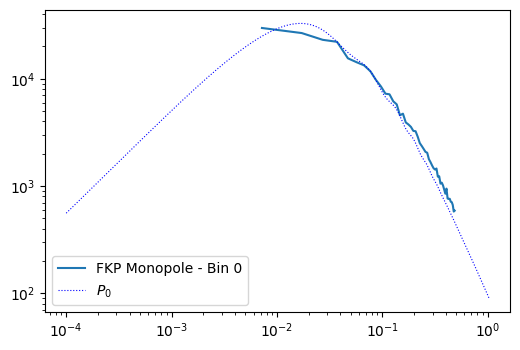

In [22]:
plt.figure(dpi = 100)
for i in range(ntracers):
    plt.loglog(k, np.mean(P0_FKP, axis = 1)[i]/3., label = f'FKP Monopole - Bin {i}')
    plt.loglog(Pk_dict['k'], P_mono, color = 'b', linestyle = ':', linewidth = 0.8, label = '$P_0$')
    plt.legend()

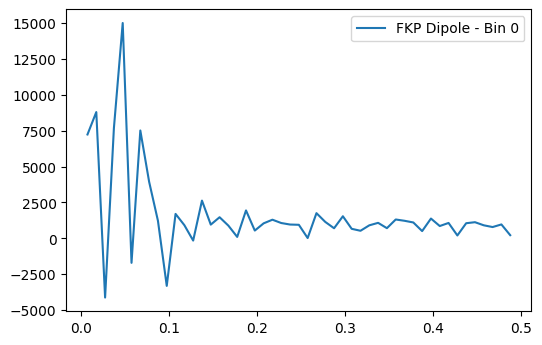

In [23]:
plt.figure(dpi = 100)
for i in range(ntracers):
    plt.plot(k, np.mean(P2_FKP, axis = 1)[i], label = f'FKP Dipole - Bin {i}')
    plt.legend()

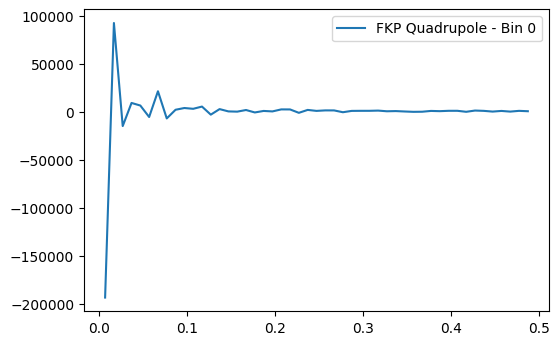

In [24]:
plt.figure(dpi = 100)
for i in range(ntracers):
    plt.plot(k, np.mean(P4_FKP, axis = 1)[i], label = f'FKP Quadrupole - Bin {i}')
    plt.legend()